In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print(os.listdir("../input/histopathologic-cancer-detection"))

#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['sample_submission.csv', 'train_labels.csv', 'test', 'train']


In [2]:
import tensorflow as tf 
import matplotlib.pyplot as  plt
import  tensorflow_datasets as tfds

!pip install tensorflow
!pip install keras
!pip install Pillow

import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam

from keras.models import Sequential
from keras.applications.resnet50 import ResNet50
from keras import layers
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Activation
from keras import backend as k 
from tensorflow.keras import layers
import tensorflow_hub as hub

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
labels = pd.read_csv('../input/histopathologic-cancer-detection/train_labels.csv')
print(labels.head())

                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0


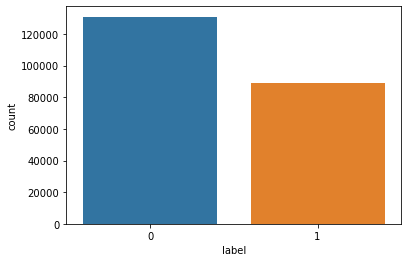

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x= labels['label'])

In [6]:
labels['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

In [7]:
labels['label']=labels['label'].apply(lambda x: str(x))

In [8]:
print(len(labels))

220025


In [9]:
train= "../input/histopathologic-cancer-detection/train"
#test= '../input/histopathologic-cancer-detection/test'
print(len(os.listdir(train)))

220025


In [10]:
train_img= plt.imread('../input/histopathologic-cancer-detection/train/' + labels.iloc[0]['id'] + '.tif')

print('Image Shape:', train_img.shape)

Image Shape: (96, 96, 3)


0


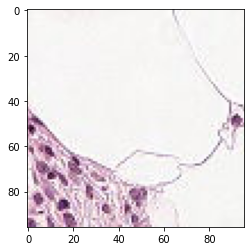

1


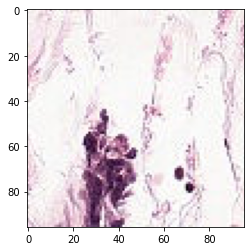

0


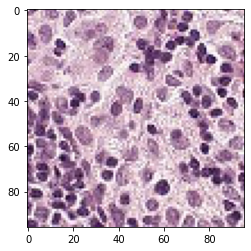

0


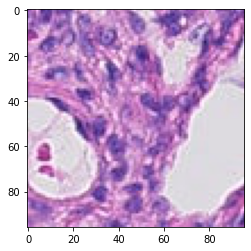

0


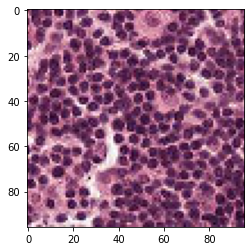

In [11]:
for i in range(5) :
    train_img= plt.imread('../input/histopathologic-cancer-detection/train/' + labels.iloc[i]['id'] + '.tif')
    print(labels.iloc[i]['label'])    
    plt.imshow(train_img)
    plt.show()

**DATA GENERATORS**


In [12]:
y= labels['label']
from sklearn.model_selection import train_test_split

trainx, valx = train_test_split(labels,test_size=0.2, random_state= 99, stratify= y)
print(trainx.shape)
print(valx.shape)
print(trainx['label'].value_counts())
print(valx['label'].value_counts())

print(len(trainx['id']))
print(len(valx['id']))

(176020, 2)
(44005, 2)
0    104726
1     71294
Name: label, dtype: int64
0    26182
1    17823
Name: label, dtype: int64
176020
44005


In [13]:
train='../input/histopathologic-cancer-detection/train'
valid= '../input/histopathologic-cancer-detection/train'

In [14]:
labels['id']=labels['id'].apply(lambda x: x+'.tif')
labels.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835.tif,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif,1
2,755db6279dae599ebb4d39a9123cce439965282d.tif,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif,0
4,068aba587a4950175d04c680d38943fd488d6a9d.tif,0


In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function=lambda x:(x - x.mean()) / x.std() if x.std() > 0 else x,
                                   horizontal_flip=True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=lambda x:(x - x.mean()) / x.std() if x.std() > 0 else x)


In [16]:
datagen = ImageDataGenerator(
       horizontal_flip=True,
       vertical_flip=True,
       brightness_range=[0.5, 1.5],
       fill_mode='reflect',                               
       rotation_range=15,
       rescale=1./255,
       #shear_range=0.2,
       zoom_range=0.2,
       validation_split=0.2)

In [17]:
tragen= datagen.flow_from_dataframe(
    dataframe= labels,
    directory= train,
    x_col= 'id',
    y_col= 'label',
    batch_size= 64,
    shuffle= True,
    subset= 'training',
    seed= 2020,
    class_mode= 'binary',
    target_size= (96,96)
)

validgen=datagen.flow_from_dataframe(
    dataframe= labels,
    directory= valid,
    x_col= 'id',
    y_col= 'label',
    batch_size= 32,
    shuffle= False,
    subset= 'validation',
    seed= 2020,
    class_mode= 'binary',
    target_size= (96,96))

testgen=datagen.flow_from_dataframe(
    dataframe= labels,
    directory= train,
    x_col= 'id',
    y_col= 'label',
    batch_size= 32,
    shuffle= False,
    subset= 'validation',
    seed= 2020,
    class_mode= 'binary',
    target_size= (96,96))



Found 176020 validated image filenames belonging to 2 classes.
Found 44005 validated image filenames belonging to 2 classes.
Found 44005 validated image filenames belonging to 2 classes.


In [18]:
tragen.class_indices['0']= 'No Tumor'
tragen.class_indices['1']= 'Tumor'
tragen.class_indices

{'0': 'No Tumor', '1': 'Tumor'}

In [19]:
validgen.class_indices['0']= 'No Tumor'
validgen.class_indices['1']= 'Tumor'
validgen.class_indices

{'0': 'No Tumor', '1': 'Tumor'}

In [20]:
testgen.class_indices['0']= 'No Tumor'
testgen.class_indices['1']= 'Tumor'
testgen.class_indices

{'0': 'No Tumor', '1': 'Tumor'}

In [21]:
model= Sequential()
model.add(Conv2D(16,(3,3), activation= 'relu', input_shape=(96,96,3)))
model.add(BatchNormalization())
model.add(Conv2D(16,(3,3), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(32,(3,3), activation= 'relu',use_bias= False))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), activation= 'relu', use_bias= False))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3), activation= 'relu',use_bias= False))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), activation= 'relu', use_bias= False))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(96,(3,3), activation= 'relu', use_bias= False))
model.add(BatchNormalization())
model.add(Conv2D(96,(3,3), activation= 'relu', use_bias= False))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation= "sigmoid"))




In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 94, 94, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 92, 92, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        4

In [23]:
model.compile(optimizer= Adam(0.001),
              loss= 'binary_crossentropy',
              metrics= ["accuracy"])

In [24]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

STEP_SIZE_TRAIN=tragen.n//tragen.batch_size
STEP_SIZE_VALID=validgen.n//validgen.batch_size
STEP_SIZE_TEST=testgen.n//testgen.batch_size

In [25]:
earlystop = EarlyStopping(monitor='val_loss', patience=2, verbose=1,
                             mode= 'max', restore_best_weights=True)
reduce = ReduceLROnPlateau(monitor='val_loss', patience=1,
                            verbose=1,mode= 'max', factor=0.1, min_lr= 0.001)

history= model.fit_generator(tragen, steps_per_epoch= STEP_SIZE_TRAIN,
                             validation_data= validgen,
                             validation_steps= STEP_SIZE_VALID, epochs= 20,
                             callbacks= [earlystop, reduce])

Epoch 1/20
2750/2750 [==============================] - 2289s 832ms/step - loss: 0.4406 - accuracy: 0.8016 - val_loss: 0.3837 - val_accuracy: 0.8338
Epoch 2/20
2750/2750 [==============================] - 1085s 394ms/step - loss: 0.3605 - accuracy: 0.8441 - val_loss: 0.4172 - val_accuracy: 0.8217
Epoch 3/20
2750/2750 [==============================] - 1046s 380ms/step - loss: 0.3257 - accuracy: 0.8619 - val_loss: 0.5558 - val_accuracy: 0.7841
Epoch 4/20
2750/2750 [==============================] - 1097s 399ms/step - loss: 0.3001 - accuracy: 0.8757 - val_loss: 0.5871 - val_accuracy: 0.7925
Epoch 5/20
2750/2750 [==============================] - 1095s 398ms/step - loss: 0.2840 - accuracy: 0.8829 - val_loss: 0.6342 - val_accuracy: 0.7766
Epoch 6/20
2750/2750 [==============================] - ETA: 0s - loss: 0.2701 - accuracy: 0.8904
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.
2750/2750 [==============================] - 1138s 414ms/step - loss: 0.2701 - accuracy: 0.89

In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
tragen.class_indices

{'0': 'No Tumor', '1': 'Tumor'}

In [28]:
val_loss, val_acc = \
model.evaluate_generator(testgen, 
                        steps=STEP_SIZE_TEST)

print('val_loss:', val_loss)
print('val_acc:', val_acc)

val_loss: 0.6384992599487305
val_acc: 0.7774545550346375


<Figure size 432x288 with 0 Axes>

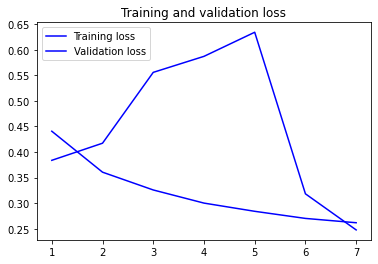

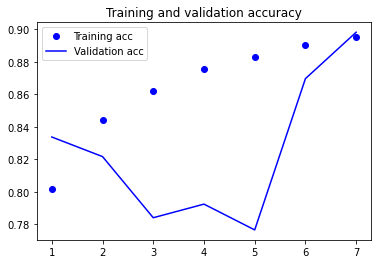

<Figure size 432x288 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [30]:
import time
t= time.time()
export= './{}.h5'.format(int(t))
print(export)

model.save(export)

./1608073834.h5


In [31]:
t= time.time()
export_tf= "./{}".format(int(t))
print(export_tf)
tf.saved_model.save(model, export_tf)

./1608073835
